In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('FLATS_FOR_12_PREZ.csv')
df
df.columns
df.head(4)

,Id;SQUARE_METERS;METRO_DISTANCE;PRICE
0,601;28;677;7328400
1,602;54;120;9754600
2,603;43;1344;6781500
3,604;33;1003;6784100


In [6]:
with open('FLATS_FOR_12_PREZ.csv', 'r') as f:
    line = f.readline().strip()
    columns = line.split(';')
    print(columns)
    
df = df[line].str.strip().str.split(';', expand = True)
df.columns = columns
df

['Id', 'SQUARE_METERS', 'METRO_DISTANCE', 'PRICE']


,Id,SQUARE_METERS,METRO_DISTANCE,PRICE
0,601,28,677,7328400
1,602,54,120,9754600
2,603,43,1344,6781500
3,604,33,1003,6784100
4,605,30,591,7296200
...,...,...,...,...
95,696,28,2073,4826700
96,697,63,2120,6800800
97,698,33,1411,6517500
98,699,47,1715,6812100


In [7]:
df[columns] = df[columns].astype(int)
df.info()
df.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Id              100 non-null    int64
 1   SQUARE_METERS   100 non-null    int64
 2   METRO_DISTANCE  100 non-null    int64
 3   PRICE           100 non-null    int64
dtypes: int64(4)
memory usage: 3.3 KB


,Id,SQUARE_METERS,METRO_DISTANCE,PRICE
90,691,67,1133,8716000
91,692,22,424,6948000
92,693,44,800,7995000
93,694,54,527,8634800
94,695,60,842,8989500
95,696,28,2073,4826700
96,697,63,2120,6800800
97,698,33,1411,6517500
98,699,47,1715,6812100
99,700,31,1785,5583200


-225829.43333333332


,Id,SQUARE_METERS,METRO_DISTANCE,PRICE,Predict
0,601,28,677,7328400,6212533
1,602,54,120,9754600,7607915
2,603,43,1344,6781500,7017561


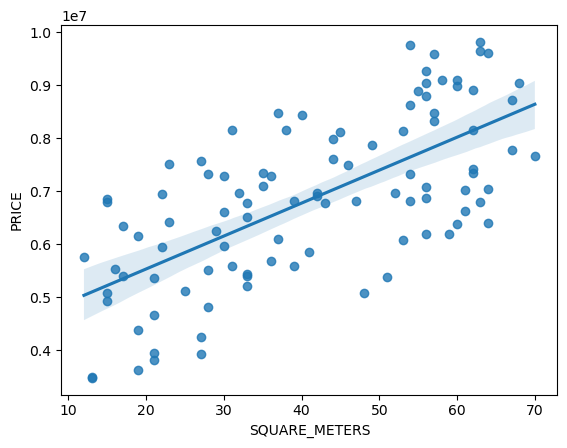

In [8]:
ratios = np.polyfit(df['SQUARE_METERS'].iloc[:int(len(df)*0.7)], df['PRICE'][:int(len(df)*0.7)], deg = 1)
sns.regplot(data = df, x = 'SQUARE_METERS', y = 'PRICE')
def predict(x):
    return ratios[1] + x * ratios[0]

without_cross = df.copy()
without_cross['Predict'] = without_cross['SQUARE_METERS'].apply(lambda x: int(predict(x)))
without_cross.tail(4)

def mse(real, predict):
    return ((real - predict)).mean()
print(mse(without_cross['PRICE'][int(len(df)*0.7):], without_cross['Predict'][int(len(df)*0.7):]) )
without_cross.head(3)

80
Среднее значение мтерики (оценки):  0.40518999970894765 Средн-квадр отклонение:  0.1367627149719824
mae метрика 1035016.781860241
Коэффициент детерминации 0.4768320896856907 должен стремиться к 1
Коэффициент наклона: 61246.497411229866
Свободный член: 4312090.922199134


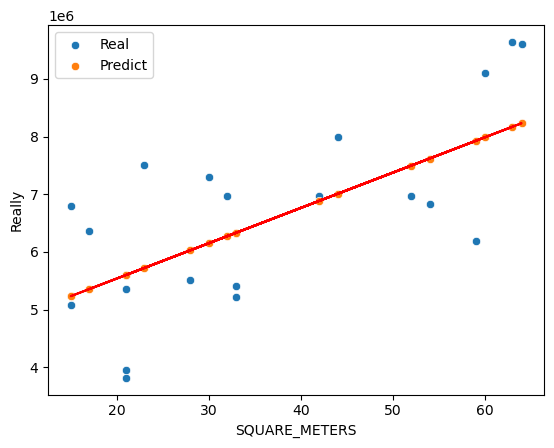

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Разделение
x_train, x_test, y_train, y_test = train_test_split(df[['SQUARE_METERS']], df['PRICE'], random_state= 40, test_size= 0.2)
x_train
print(len(x_train))

linearRegr = LinearRegression()
linearRegr.fit(x_train, y_train)
y_predict = linearRegr.predict(x_test)

# Кросс-валидация
cross_scores = cross_val_score(LinearRegression(), x_train, y_train , cv = 5, scoring= 'r2')
print("Среднее значение мтерики (оценки): ", np.array(cross_scores).mean(), 'Средн-квадр отклонение: ', np.array(cross_scores).std())

# исходные и предсказанные значения
test_really = pd.concat([x_test, pd.DataFrame({'Really': y_test}, index= x_test.index) ], axis = 1)
test_really.tail(10)
test_results = pd.concat([x_test, pd.DataFrame({'Predict': y_predict}, index= x_test.index) ], axis = 1)

sns.scatterplot(data =test_really, x = 'SQUARE_METERS', y = 'Really', label = 'Real' )
plt.plot(x_test, y_predict, color = 'red')
sns.scatterplot(data = test_results, x = 'SQUARE_METERS', y = 'Predict', label = 'Predict')
plt.legend()

# метрики качества
print('mae метрика', mean_absolute_error(y_test, y_predict))
print(f'Коэффициент детерминации {r2_score(y_test, y_predict)} должен стремиться к 1')

print("Коэффициент наклона:", linearRegr.coef_[0])
print("Свободный член:", linearRegr.intercept_)

80
Среднее значение мтерики (оценки):  0.5533233538604548 Средн-квадр отклонение:  0.15151319865224658
mae метрика 1003387.4239181249
Коэффициент детерминации 0.5142377229087103 должен стремиться к 1
Коэффициент наклона: -1651.8253700541018
Свободный член: 9037233.586513508


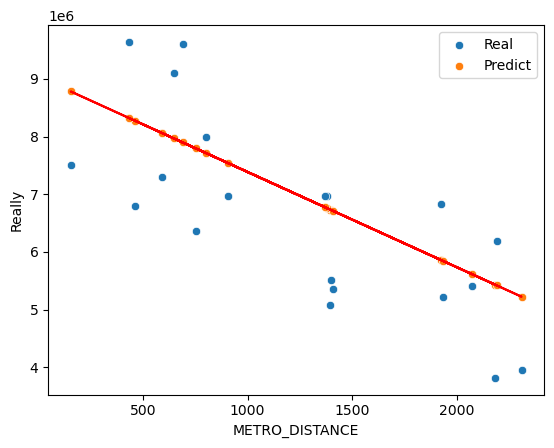

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Разделение
x_train, x_test, y_train, y_test = train_test_split(df[['METRO_DISTANCE']], df['PRICE'], random_state= 40, test_size= 0.2)
x_train
print(len(x_train))

linearRegr = LinearRegression()
linearRegr.fit(x_train, y_train)
y_predict = linearRegr.predict(x_test)

# Кросс-валидация
cross_scores = cross_val_score(LinearRegression(), x_train, y_train , cv = 5, scoring= 'r2')
print("Среднее значение мтерики (оценки): ", np.array(cross_scores).mean(), 'Средн-квадр отклонение: ', np.array(cross_scores).std())

# исходные и предсказанные значения
test_really = pd.concat([x_test, pd.DataFrame({'Really': y_test}, index= x_test.index) ], axis = 1)
test_really.tail(10)
test_results = pd.concat([x_test, pd.DataFrame({'Predict': y_predict}, index= x_test.index) ], axis = 1)

sns.scatterplot(data =test_really, x = 'METRO_DISTANCE', y = 'Really', label = 'Real' )
plt.plot(x_test, y_predict, color = 'red')
sns.scatterplot(data = test_results, x = 'METRO_DISTANCE', y = 'Predict', label = 'Predict')
plt.legend()

# метрики качества
print('mae метрика', mean_absolute_error(y_test, y_predict))
print(f'Коэффициент детерминации {r2_score(y_test, y_predict)} должен стремиться к 1')

print("Коэффициент наклона:", linearRegr.coef_[0])
print("Свободный член:", linearRegr.intercept_)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Разделение
x_train, x_test, y_train, y_test = train_test_split(df[['SQUARE_METERS', 'METRO_DISTANCE']], df['PRICE'], random_state= 40, test_size= 0.2)
x_train
print(len(x_train))

linearRegr = LinearRegression()
linearRegr.fit(x_train, y_train)
y_predict = linearRegr.predict(x_test)

# Кросс-валидация
cross_scores = cross_val_score(LinearRegression(), x_train, y_train , cv = 5, scoring= 'r2')
print("Среднее значение мтерики (оценки): ", np.array(cross_scores).mean(), 'Средн-квадр отклонение: ', np.array(cross_scores).std())

# исходные и предсказанные значения
test_really = pd.concat([x_test, pd.DataFrame({'Really': y_test}, index= x_test.index) ], axis = 1)
test_really.tail(10)
test_results = pd.concat([x_test, pd.DataFrame({'Predict': y_predict}, index= x_test.index) ], axis = 1)

# метрики качества
print('mae метрика', mean_absolute_error(y_test, y_predict))
print(f'Коэффициент детерминации {r2_score(y_test, y_predict)} должен стремиться к 1')

print("Коэффициент наклона:", linearRegr.coef_[0])
print("Свободный член:", linearRegr.intercept_)

80
Среднее значение мтерики (оценки):  0.9729769515080593 Средн-квадр отклонение:  0.009789876668434611
mae метрика 205915.5967619955
Коэффициент детерминации 0.9766998582165147 должен стремиться к 1
Коэффициент наклона: 57473.43801518701
Свободный член: 6505272.807858374
